<a href="https://colab.research.google.com/github/KARENCMP82/Python/blob/main/DSC1124ESP_Actividad_DL_Grupo_XX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning
## Actividad 1: Deep Vision

Nombre alumn@ 1

Nombre alumn@ 2

...


# Actividad Deep Vision

Diseñar y comparar dos estrategias para la clasificación de imágenes en el dataset CIFAR100 de Keras (https://keras.io/api/datasets/cifar100/)

### **Estrategia 1: Red pre-entrenada**

La primera estrategia a comparar debe incluir la utilización de redes preentrenadas con el dataset ImageNet, llevando a cabo tareas de *transfer learning* y *fine-tuning* para clasificar los objetos de CIFAR100. Deben compararse al menos dos tipos de arquitecturas (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet...) y se debe seleccionar la que mayor precisión nos dé (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera que el ejercicio presente una profunda experimentación haciendo uso todas las técnicas de optimización mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (weight regularization, dropout, batch normalization, data augmentation, etc.).

### **Estrategia 2: Entrenar desde cero o from scratch**

La segunda estrategia a comparar será una red neuronal que se debe diseñar, entrenar y optimizar. Se requiere una justificación empírica de las decisiones que llevaron a la selección de atributos, capas e hiperparámetros a los que se ha llegado. Se espera que el ejercicio presente una profunda experimentación haciendo uso de todas las técnicas de optimización mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (weight regularization, dropout, batch normalization, data augmentation...).

## Normas a seguir

- Se debe entregar un **ÚNICO GOOGLE COLAB notebook** (archivo .ipynb) que incluya las instrucciones presentes y su **EJECUCIÓN!!!**. Debe aparecer todo el proceso seguido (carga de datos, visualización de datos, proceso de entrenamiento y proceso de validación del modelo).
- Poner el nombre del grupo en el nombre del archivo y el nombre de todos los integrantes del grupo al inicio del notebook.
- Las redes utilizadas deben estar entrenadas y con las métricas extraídas en el conjunto de test.
- Es recomendable crear una última sección de texto en el notebook en la que se discutan los diferentes modelos obtenidos y se extraigan las conclusiones pertinentes.

## Criterio de evaluación

- Seguimiento de las normas establecidas en la actividad.
- Efectividad al presentar las comparaciones entre métricas de evaluación de ambos modelos.
- Demostración de la utilización de técnicas de optimización para mejorar el rendimiento de los modelos.
- Modelos predictivos con rendimiento superior al aleatorio.
- Corrección en el uso de algoritmos, modelos y formas idiomáticas en Python.
- El código debe poder ejecutarse sin modificación alguna en Google Colaboratory.

Recomendaciones en el Uso de Colab:

- Eliminar las variables innecesarias para liberar RAM mediante la sentencia:

In [13]:
# LIBRERIAS
# Bibliotecas estándar
import random

# Bibliotecas científicas y de manejo de datos
import numpy as np
# import h5py  # Solo si realmente lo vas a usar para guardar/cargar modelos en formato HDF5.
              # Para CIFAR-100 directamente no es necesario a menos que guardes modelos.

# Visualización
import matplotlib.pyplot as plt

# TensorFlow y Keras
from tensorflow import keras  # Esta es la forma principal de acceder a Keras

# O si prefieres un alias como el que tenías (ks), puedes hacer:
# import tensorflow.keras as ks # Descomenta esta y comenta la de arriba si prefieres 'ks.Sequential' etc.

# Componentes específicos de Keras (usando tensorflow.keras)
from tensorflow.keras.models import Sequential, Model # Model para redes pre-entrenadas o API Funcional
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.applications import VGG16, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet # Importa las que vayas a usar
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers # Por ejemplo, optimizers.Adam
from tensorflow.keras import regularizers # Por ejemplo, regularizers.l2(0.01)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau # Callbacks útiles



In [12]:
# DEFINICIÓN DE CONSTANTES GLOBALES
NUM_CLASSES = 100  # CIFAR-100 tiene 100 clases
INPUT_SHAPE = (32, 32, 3) # Forma de las imágenes de entrada (alto, ancho, canales)

print(f"Número de clases definido: {NUM_CLASSES}")
print(f"Forma de entrada definida: {INPUT_SHAPE}")

Número de clases definido: 100
Forma de entrada definida: (32, 32, 3)


x_train: Son las imágenes que usarás para entrenar tu red neuronal. Es el conjunto de datos más grande, con el que el modelo "aprende".

y_train: Son las etiquetas correctas (números del 0 al 99 que representan cada categoría) correspondientes a cada imagen en x_train. Le dicen al modelo cuál es la respuesta correcta durante el entrenamiento.

x_test: Son las imágenes que usarás para probar qué tan bien ha aprendido tu modelo después de entrenarlo. El modelo no ve estas imágenes durante el entrenamiento.

y_test: Son las etiquetas correctas correspondientes a cada imagen en x_test. Las usas para comparar las predicciones del modelo en x_test y ver cuántas acierta.

In [14]:
# Cargar dataset: (x_train, y_train), (x_test, y_test) = cifar100.load_data().
print("[INFO]: Loading CIFAR-100 data...")
((x_train, y_train), (x_test, y_test)) = cifar100.load_data()
# Para verificar que se cargó correctamente, puedes imprimir las formas (shapes)
print("###########################")
print(f"Forma de x_train: {x_train.shape}")
print(f"Forma de y_train: {y_train.shape}")
print(f"Forma de x_test: {x_test.shape}")
print(f"Forma de y_test: {y_test.shape}")

[INFO]: Loading CIFAR-100 data...
###########################
Forma de x_train: (50000, 32, 32, 3)
Forma de y_train: (50000, 1)
Forma de x_test: (10000, 32, 32, 3)
Forma de y_test: (10000, 1)


In [15]:
#Definir los nombres de las clases (etiquetas finas):
# Nombres de las 100 clases "finas" de CIFAR-100
# Estos nombres están en el orden correspondiente a las etiquetas numéricas 0-99
arrayEtiqueta = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

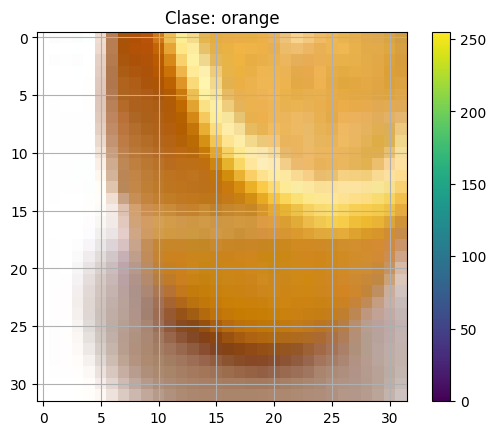

In [16]:
# 0. ASEGÚRATE DE QUE ESTAS VARIABLES ESTÉN DEFINIDAS DE CELDAS ANTERIORES:
# x_train, y_train, arrayEtiqueta

# 1. DEFINE EL ÍNDICE DE LA IMAGEN QUE QUIERES MOSTRAR
#    (Este es un ejemplo, DEBES encontrar un índice real de una imagen de bosque)
indiceImagenXtrain = 123 # ¡¡DEBES CAMBIAR ESTO!!

# 2. OBTÉN EL NOMBRE DE LA ETIQUETA PARA EL TÍTULO (opcional, pero bueno)
indice_numerico_etiqueta = y_train[indiceImagenXtrain][0]
nombre_etiqueta = arrayEtiqueta[indice_numerico_etiqueta]

# 3. CÓDIGO PARA MOSTRAR
plt.figure()
plt.imshow(x_train[indiceImagenXtrain]) # <--- CORRECCIÓN CLAVE: Muestra la IMAGEN
plt.title(f"Clase: {nombre_etiqueta}") # <--- Título con el nombre de la etiqueta
plt.colorbar()
plt.grid(True)
plt.axis('on') # Por defecto está 'on', puedes poner 'off' si quieres quitar los ejes
plt.show()


[INFO]: Visualizando algunas imágenes de entrenamiento...


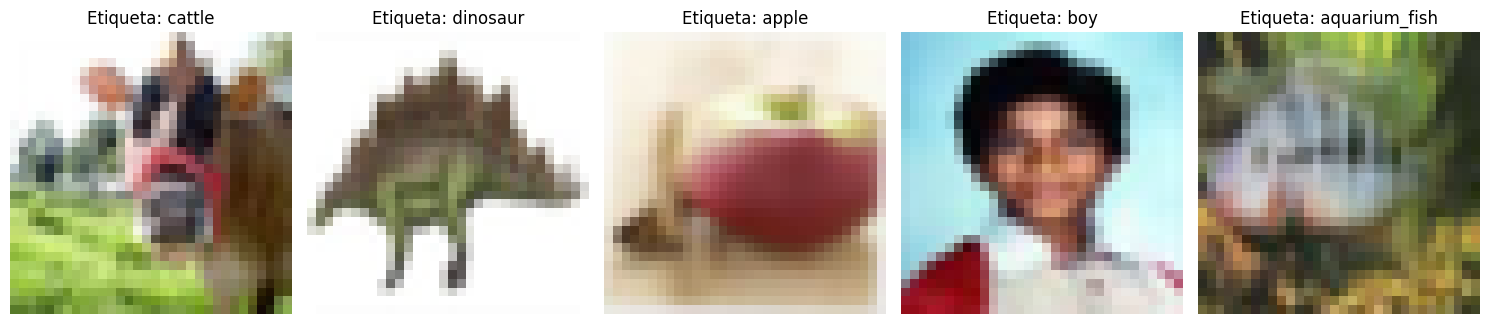

In [17]:
#Visualizar algunas imágenes y sus etiquetas para entender los datos.
print("\n[INFO]: Visualizando algunas imágenes de entrenamiento...")
num_images_to_show = 5
plt.figure(figsize=(15, 5)) # <--- MODIFICACIÓN: Ajusta figsize (ancho, alto) para mejor visualización en una fila

for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i + 1) # <--- MODIFICACIÓN: Para organizar en 1 fila, num_images_to_show columnas
    plt.imshow(x_train[i])  # <--- CORRECCIÓN: Usar x_train (antes usabas images_train que no estaba definida aquí)
    label_index = y_train[i][0] # <--- MODIFICACIÓN: Mejor extraer el índice primero
    plt.title(f"Etiqueta: {arrayEtiqueta[label_index]}") # <--- CORRECCIÓN: Usar y_train (antes usabas labels_train) y el índice extraído
    plt.axis('off')

plt.tight_layout() # <--- ADICIÓN: Ajusta el espaciado entre subplots para que no se superpongan títulos
plt.show() # <--- MODIFICACIÓN: Llamar a show() una vez fuera del bucle para mostrar todas las imágenes juntas



In [18]:
# Normalizar píxeles de imágenes (e.g., dividir por 255.0).

print("\n[INFO]: Normalizando imágenes (valores de píxeles a [0,1])...")
# Es buena práctica crear nuevas variables para los datos preprocesados
# o asegurarse de que no necesitas las originales sin normalizar más adelante.
x_train_normalized = x_train.astype('float32') / 255.0  # <--- CORRECCIÓN: Usar x_train y asignar a nueva variable
x_test_normalized = x_test.astype('float32') / 255.0    # <--- CORRECCIÓN: Usar x_test y asignar a nueva variable
print("Imágenes normalizadas.")
print(f"Tipo de datos de x_train_normalized: {x_train_normalized.dtype}")
print(f"Valores min/max en x_train_normalized después de normalizar: {x_train_normalized.min()}, {x_train_normalized.max()}")



[INFO]: Normalizando imágenes (valores de píxeles a [0,1])...
Imágenes normalizadas.
Tipo de datos de x_train_normalized: float32
Valores min/max en x_train_normalized después de normalizar: 0.0, 1.0


Estrategia 1: Red Pre-entrenada (Transfer Learning y Fine-tuning):
* Para cada arquitectura pre-entrenada a probar (al menos 2, e.g., VGG16 y ResNet50):


1.   Una capa de entrada que aplana imágenes de 32x32x3.
2.   Una capa oculta densa con 128 neuronas y activación ReLU.
3.   Una capa de salida densa con 10 neuronas y activación softmax (que debería ser 100 para CIFAR-100).






In [25]:
# TITULO: Modelo secuencial, almacenado (TITULO)  <-- O como la llames
model = keras.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3]),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax") # ¡¡¡AQUÍ ESTÁ EL PROBLEMA!!!
])

In [26]:
# mide q tal esacto el modelo del entrenamiento
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Entrenar el modelo

In [28]:
#ENTRENAMIENTO
#ENTRENAMIENTO
model.fit(x_train, y_train, epochs=10, verbose=1) # <-- Usas 'model'

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-27-5d979f48b96c>", line 2, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 113, in one_step_on_data

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 60, in train_step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/trainer.py", line 383, in _compute_loss

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/trainer.py", line 351, in compute_loss

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/compile_utils.py", line 691, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/compile_utils.py", line 700, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/loss.py", line 67, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py", line 33, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py", line 2246, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py", line 1963, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py", line 744, in sparse_categorical_crossentropy

Received a label value of 99 which is outside the valid range of [0, 10).  Label values: 54 69 1 95 3 22 54 69 12 19 93 31 71 57 74 84 34 0 10 16 85 68 44 99 6 66 30 21 93 92 28 97
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_multi_step_on_iterator_3956]

In [ ]:
 Image Classifier en Tensorflow

 24min

 cambiar con ia esto ultimo los valores estan muy mal
